In [1]:
DEMOGRAPHICS_PATIENTS = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/ShunSasai_SCP_clean/scripts/utils/subj_list/subject_list_patient_COBRE.mat'
DEMOGRAPHICS_CONTROLS = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/ShunSasai_SCP_clean/scripts/utils/subj_list/subject_list_control_COBRE.mat'
STRUCTURAL_DERIVATIVES = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/Schizconnect_raw_data/COBRE/COBREqsirecon/derivatives/qsirecon-MRtrix3_fork-SS3T_act-HSVS'
FUNCTIONAL_DERIVATIVES = '/run/user/1000/gvfs/sftp:host=tononi-1/Volumes/White_Elephant/Schizophrenia/Schizconnect_raw_data/COBRE/COBRExcpd/'
# ATLASES = ['4S156', '4S256', '4S456']
ATLASES = ['4S156']
ATLAS = ATLASES[0]

def print2(expression: str):
    print('>>> ' + expression)
    print(eval(expression))
    print()

In [2]:
%%time

from bids import BIDSLayout, BIDSLayoutIndexer

indexer = BIDSLayoutIndexer(validate=False, index_metadata=False)

structural_derivatives = BIDSLayout(
    STRUCTURAL_DERIVATIVES,
    indexer=indexer,
)

functional_derivatives = BIDSLayout(
    FUNCTIONAL_DERIVATIVES,
    indexer=indexer,
)

CPU times: user 10.4 s, sys: 330 ms, total: 10.7 s
Wall time: 40.3 s


In [3]:
import importlib
import schiz_wholebrain
importlib.reload(schiz_wholebrain)
from schiz_wholebrain.subject import Subject

# A `Subject` is made of a subject label and (optionally) connectivity
# and demographics data:

A00024160 = Subject(
    'A00024160',
    structural_session_label = '20090101',
    structural_derivatives = structural_derivatives.root,
    functional_session_label = '20090101',
    functional_derivatives = functional_derivatives.root,
    atlases = ATLASES,
    demographics = {'diagnosis': 'sick', 'country': 'XYZ', 'height': 1.8},
)

print2('A00024160')
print2('A00024160.demographics')

print2('A00024160.functional_session')
print2('A00024160.functional_connectivity[ATLAS]')
print2('A00024160.structural_session')
print2('A00024160.structural_connectivity[ATLAS]')


>>> A00024160
Subject(A00024160, sick)

>>> A00024160.demographics
{'diagnosis': 'sick', 'country': 'XYZ', 'height': 1.8}

>>> A00024160.functional_session
20090101

>>> A00024160.functional_connectivity[ATLAS]
FunctionalConnectivity

>>> A00024160.structural_session
20090101

>>> A00024160.structural_connectivity[ATLAS]
StructuralConnectivity



In [17]:
import importlib
from schiz_wholebrain.cohort import Cohort
importlib.reload(schiz_wholebrain)
from schiz_wholebrain.cohort import Cohort

# Cohorts can be created by passing an Iterable of Subjects:
mycohort = Cohort([A00024160])
print2('mycohort')

# Or by calling the special method `Cohort.cohort_from_data()`, to go
# straight from data paths and BIDS layouts to a Cohort pre-filled
# with Subjects.

patients = Cohort.cohort_from_data(
    DEMOGRAPHICS_PATIENTS,
    structural_derivatives,
    functional_derivatives,
    ATLASES,
    sample_size=25,
)

>>> mycohort
Cohort({Subject(A00024160, sick)})



  0%|                                        | 0/25 [00:00<?, ?it/s]

  4%|█▎                              | 1/25 [01:13<29:17, 73.24s/it]

  8%|██▌                             | 2/25 [01:28<14:54, 38.89s/it]

 12%|███▊                            | 3/25 [01:30<08:12, 22.39s/it]

 16%|█████                           | 4/25 [01:33<05:05, 14.55s/it]

 24%|███████▋                        | 6/25 [01:43<02:58,  9.41s/it]

 32%|██████████▏                     | 8/25 [01:43<01:33,  5.48s/it]

 36%|███████████▌                    | 9/25 [01:44<01:09,  4.34s/it]

 44%|█████████████▋                 | 11/25 [01:50<00:52,  3.75s/it]

 48%|██████████████▉                | 12/25 [01:50<00:39,  3.02s/it]

 60%|██████████████████▌            | 15/25 [01:52<00:18,  1.81s/it]

 64%|███████████████████▊           | 16/25 [01:53<00:14,  1.66s/it]

 68%|█████████████████████          | 17/25 [01:53<00:10,  1.33s/it]

 72%|██████████████████████▎        | 18/25 [01:53<00:07,  1.09s/it]

 80%|████████████████████████▊      | 20/25 [01:53<00:03,  1.39it/s]

 88%|███████████████████████████▎   | 22/25 [01:54<00:01,  2.02it/s]

 92%|████████████████████████████▌  | 23/25 [01:54<00:00,  2.32it/s]

 96%|█████████████████████████████▊ | 24/25 [01:55<00:00,  1.86it/s]

100%|███████████████████████████████| 25/25 [02:01<00:00,  1.99s/it]

100%|███████████████████████████████| 25/25 [02:01<00:00,  4.87s/it]

In [18]:
controls = Cohort.cohort_from_data(
    DEMOGRAPHICS_CONTROLS,
    structural_derivatives,
    functional_derivatives,
    ATLASES,
    sample_size=25,
)

  0%|                                        | 0/25 [00:00<?, ?it/s]

  4%|█▎                              | 1/25 [01:23<33:13, 83.07s/it]

  8%|██▌                             | 2/25 [01:31<14:56, 38.97s/it]

 12%|███▊                            | 3/25 [01:36<08:42, 23.73s/it]

 16%|█████                           | 4/25 [01:37<05:04, 14.50s/it]

 20%|██████▍                         | 5/25 [01:45<04:09, 12.47s/it]

 28%|████████▉                       | 7/25 [01:47<01:56,  6.47s/it]

 32%|██████████▏                     | 8/25 [01:48<01:27,  5.16s/it]

 36%|███████████▌                    | 9/25 [01:51<01:12,  4.53s/it]

 40%|████████████▍                  | 10/25 [01:52<00:53,  3.58s/it]

 52%|████████████████               | 13/25 [01:53<00:20,  1.69s/it]

 60%|██████████████████▌            | 15/25 [01:54<00:13,  1.32s/it]

 64%|███████████████████▊           | 16/25 [01:54<00:10,  1.12s/it]

 68%|█████████████████████          | 17/25 [01:55<00:07,  1.03it/s]

 76%|███████████████████████▌       | 19/25 [01:55<00:04,  1.46it/s]

 84%|██████████████████████████     | 21/25 [01:56<00:02,  1.67it/s]

 88%|███████████████████████████▎   | 22/25 [01:56<00:01,  1.84it/s]

 96%|█████████████████████████████▊ | 24/25 [01:57<00:00,  2.10it/s]

100%|███████████████████████████████| 25/25 [02:03<00:00,  1.60s/it]

100%|███████████████████████████████| 25/25 [02:03<00:00,  4.94s/it]

In [129]:
print2("f'{len(patients)} patients and {len(controls)} controls.'")

# Cohorts also support simple indexing by label:
A00021058 = controls['A00021058']
print('A00021058')

# Cohorts behave like sets, relying on subject labels for element uniqueness:
print2('set.intersection(patients, controls)')

print2("f'{len(set.union(patients, controls))} subjects in total.'")

print2("A00021058 in controls")
# Same as:
print2("'A00021058' in controls")

>>> f'{len(patients)} patients and {len(controls)} controls.'
25 patients and 25 controls.



KeyError: 'No subject found with label: A00021058'

In [21]:
# A Cohort subset can be derived by calling `Cohort.filter()` and passing an
# arbitrary function describing the condition to be met for single subjects.
# This is syntactic sugar for:
#     `subcohort = Cohort(filter(condition, cohort))`

def filter_by_motion(subject):
    threshold = 0.5
    return subject.functional_connectivity[ATLAS].motion_outliers_ratio < threshold

low_motion_patients = patients.filter(filter_by_motion)
low_motion_controls = controls.filter(filter_by_motion)

print2("f'{len(low_motion_patients)} patients and {len(low_motion_controls)} controls.'")

print2('low_motion_controls.labels')

# Arbitrary Subject attributes can be easily collected for the whole Cohort...
demographics = low_motion_patients.collect("demographics", subject_labels=True)
print2('demographics')
print2('dict(list(demographics)[0:3])')

# ...this supports attributes deep-nested within Subjects:
attribute = f"connectivity_{ATLAS}.functional.motion_outliers_ratio"
print2('attribute')
print2('list(low_motion_patients.collect(attribute))')

>>> f'{len(low_motion_patients)} patients and {len(low_motion_controls)} controls.'
22 patients and 23 controls.

>>> low_motion_controls.labels
{'A00024535', 'A00013816', 'A00021072', 'A00015826', 'A00003150', 'A00020968', 'A00022653', 'A00023848', 'A00024372', 'A00023131', 'A00024301', 'A00010684', 'A00021085', 'A00023800', 'A00027787', 'A00023866', 'A00022810', 'A00024955', 'A00018553', 'A00014225', 'A00023095', 'A00011265', 'A00014898'}

>>> demographics
<generator object Cohort.collect at 0x7149165d9dd0>

>>> dict(list(demographics)[0:3])
{'A00000368': {'age': 52, 'sex': 'male', 'subdiagnosis': 'Schizophrenia_Strict', 'diagnosis': 'SSD'}, 'A00018317': {'age': 57, 'sex': 'male', 'subdiagnosis': 'Schizophrenia_Strict', 'diagnosis': 'SSD'}, 'A00020416': {'age': 50, 'sex': 'male', 'subdiagnosis': 'Schizoaffective', 'diagnosis': 'SSD'}}

>>> attribute
connectivity_4S156.functional.motion_outliers_ratio

>>> list(low_motion_patients.collect(attribute))
[0.21333333333333335, 0.1733333333

In [140]:
import numpy as np
import importlib
from schiz_wholebrain import quantities
importlib.reload(quantities)
from schiz_wholebrain.quantities import (
    aln_model, aln_functional_connectivity, matrix2matrix_correlation
)

# The `quantities` module contains functions which operate on whole subjects.
# `Subject.compute()` is a convenience function which automatically
# stores the result in a dictionary called `Subject.quantities`.
# A similar interface called `Cohort.compute()` exists to process and
# store the quantity in parallel for whole cohorts.

union = Cohort(set.union(low_motion_patients, low_motion_controls))

# Correlations with structural connectivity.

union.compute(
    matrix2matrix_correlation,
    key='structure_function_correlation',
    matrix1=f'connectivity_{ATLAS}.structural.raw_count',
    matrix2=f'connectivity_{ATLAS}.functional.correlation_matrix',
)

# Correlations with simulated functional connectivity.

union.compute(aln_model, max_workers=18, duration=300)
union.compute(
    aln_functional_connectivity,
    transient=12,
    bandpass=(0.01, 0.1),
    sampling_rate=0.5,
)
union.compute(
    matrix2matrix_correlation,
    key='aln_correlation',
    matrix1=f'quantities[aln_functional_connectivity]',
    matrix2=f'connectivity_{ATLAS}.functional.correlation_matrix',
)

# Correlations with simulated functional connectivity, based on cohort's mean
# structural connectivity.

for cohort in (low_motion_patients, low_motion_controls):
    counts = cohort.collect(f"connectivity_{ATLAS}.structural.raw_count")
    lengths = cohort.collect(f"connectivity_{ATLAS}.structural.mean_length")
    mean_count = np.stack(list(counts), axis=-1).mean(axis=-1)
    mean_length = np.stack(list(lengths), axis=-1).mean(axis=-1)

    for subject in cohort:
        subject.quantities['cohort_mean_raw_count'] = mean_count
        subject.quantities['cohort_mean_mean_length'] = mean_length

union.compute(
    aln_model,
    key='aln_model_cohort_mean',
    max_workers=18,
    duration=300,
    mean_structural=True
)
union.compute(
    aln_functional_connectivity,
    key='aln_functional_connectivity_cohort_mean',
    model_key='aln_model_cohort_mean',
    transient=12,
    bandpass=(0.01, 0.1),
    sampling_rate=0.5,
)
union.compute(
    matrix2matrix_correlation,
    key='aln_correlation_cohort_mean',
    matrix1=f'quantities[aln_functional_connectivity_cohort_mean]',
    matrix2=f'connectivity_{ATLAS}.functional.correlation_matrix',
)


  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                               | 1/45 [00:00<00:14,  3.04it/s]

  4%|█▍                              | 2/45 [00:00<00:14,  2.91it/s]

  7%|██▏                             | 3/45 [00:01<00:14,  2.92it/s]

  9%|██▊                             | 4/45 [00:01<00:13,  2.98it/s]

 11%|███▌                            | 5/45 [00:01<00:13,  2.98it/s]

 13%|████▎                           | 6/45 [00:02<00:12,  3.02it/s]

 16%|████▉                           | 7/45 [00:02<00:12,  2.99it/s]

 18%|█████▋                          | 8/45 [00:02<00:12,  2.96it/s]

 20%|██████▍                         | 9/45 [00:03<00:11,  3.00it/s]

 22%|██████▉                        | 10/45 [00:03<00:11,  3.02it/s]

 24%|███████▌                       | 11/45 [00:03<00:11,  3.05it/s]

 27%|████████▎                      | 12/45 [00:03<00:10,  3.03it/s]

 29%|████████▉                      | 13/45 [00:04<00:10,  3.03it/s]

 31%|█████████▋                     | 14/45 [00:04<00:10,  3.03it/s]

 33%|██████████▎                    | 15/45 [00:05<00:10,  2.96it/s]

 36%|███████████                    | 16/45 [00:05<00:09,  2.98it/s]

 38%|███████████▋                   | 17/45 [00:05<00:09,  3.00it/s]

 40%|████████████▍                  | 18/45 [00:06<00:09,  2.98it/s]

 42%|█████████████                  | 19/45 [00:06<00:08,  3.09it/s]

 44%|█████████████▊                 | 20/45 [00:06<00:08,  3.11it/s]

 47%|██████████████▍                | 21/45 [00:06<00:07,  3.12it/s]

 49%|███████████████▏               | 22/45 [00:07<00:07,  3.12it/s]

 51%|███████████████▊               | 23/45 [00:07<00:06,  3.19it/s]

 53%|████████████████▌              | 24/45 [00:07<00:06,  3.21it/s]

 56%|█████████████████▏             | 25/45 [00:08<00:06,  3.22it/s]

 58%|█████████████████▉             | 26/45 [00:08<00:05,  3.20it/s]

 60%|██████████████████▌            | 27/45 [00:08<00:05,  3.24it/s]

 62%|███████████████████▎           | 28/45 [00:09<00:05,  3.24it/s]

 64%|███████████████████▉           | 29/45 [00:09<00:04,  3.24it/s]

 67%|████████████████████▋          | 30/45 [00:09<00:04,  3.26it/s]

 69%|█████████████████████▎         | 31/45 [00:10<00:04,  3.25it/s]

 71%|██████████████████████         | 32/45 [00:10<00:04,  3.25it/s]

 73%|██████████████████████▋        | 33/45 [00:10<00:03,  3.23it/s]

 76%|███████████████████████▍       | 34/45 [00:10<00:03,  3.24it/s]

 78%|████████████████████████       | 35/45 [00:11<00:03,  3.25it/s]

 80%|████████████████████████▊      | 36/45 [00:11<00:02,  3.21it/s]

 82%|█████████████████████████▍     | 37/45 [00:11<00:02,  3.21it/s]

 84%|██████████████████████████▏    | 38/45 [00:12<00:02,  3.21it/s]

 87%|██████████████████████████▊    | 39/45 [00:12<00:01,  3.22it/s]

 89%|███████████████████████████▌   | 40/45 [00:12<00:01,  3.19it/s]

 91%|████████████████████████████▏  | 41/45 [00:13<00:01,  3.18it/s]

 93%|████████████████████████████▉  | 42/45 [00:13<00:00,  3.19it/s]

 96%|█████████████████████████████▌ | 43/45 [00:13<00:00,  3.19it/s]

 98%|██████████████████████████████▎| 44/45 [00:14<00:00,  3.13it/s]

100%|███████████████████████████████| 45/45 [00:14<00:00,  3.35it/s]

100%|███████████████████████████████| 45/45 [00:14<00:00,  3.14it/s]

  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                            | 1/45 [07:02<5:10:06, 422.87s/it]

  4%|█▎                           | 2/45 [07:20<2:12:15, 184.54s/it]

  7%|█▉                           | 3/45 [07:26<1:12:04, 102.96s/it]

  9%|██▊                             | 4/45 [07:26<42:40, 62.44s/it]

 11%|███▌                            | 5/45 [07:29<27:09, 40.73s/it]

 13%|████▎                           | 6/45 [07:29<17:32, 27.00s/it]

 16%|████▉                           | 7/45 [07:30<11:46, 18.58s/it]

 18%|█████▋                          | 8/45 [07:33<08:18, 13.47s/it]

 20%|██████▍                         | 9/45 [07:33<05:38,  9.39s/it]

 22%|██████▉                        | 10/45 [07:33<03:50,  6.58s/it]

 24%|███████▌                       | 11/45 [07:35<02:51,  5.04s/it]

 27%|████████▎                      | 12/45 [07:36<02:04,  3.78s/it]

 29%|████████▉                      | 13/45 [07:39<01:52,  3.51s/it]

 31%|█████████▋                     | 14/45 [07:40<01:24,  2.72s/it]

 33%|██████████▎                    | 15/45 [07:54<03:04,  6.15s/it]

 36%|███████████                    | 16/45 [07:58<02:43,  5.64s/it]

 38%|███████████▋                   | 17/45 [08:00<02:04,  4.46s/it]

 40%|████████████▍                  | 18/45 [08:11<02:57,  6.57s/it]

 42%|████████████▋                 | 19/45 [15:22<58:04, 134.02s/it]

 44%|█████████████▊                 | 20/45 [15:29<39:54, 95.77s/it]

 47%|██████████████▍                | 21/45 [15:31<27:02, 67.62s/it]

 49%|███████████████▏               | 22/45 [15:34<18:26, 48.13s/it]

 51%|███████████████▊               | 23/45 [15:35<12:33, 34.25s/it]

 53%|████████████████▌              | 24/45 [15:39<08:45, 25.01s/it]

 56%|█████████████████▏             | 25/45 [15:40<05:59, 17.97s/it]

 58%|█████████████████▉             | 26/45 [15:41<04:01, 12.69s/it]

 60%|██████████████████▌            | 27/45 [15:54<03:51, 12.85s/it]

 62%|███████████████████▎           | 28/45 [15:58<02:54, 10.25s/it]

 64%|███████████████████▉           | 29/45 [16:02<02:11,  8.21s/it]

 67%|████████████████████▋          | 30/45 [16:06<01:46,  7.07s/it]

 69%|█████████████████████▎         | 31/45 [16:13<01:38,  7.05s/it]

 71%|██████████████████████         | 32/45 [16:14<01:08,  5.27s/it]

 73%|██████████████████████▋        | 33/45 [16:21<01:07,  5.63s/it]

 76%|███████████████████████▍       | 34/45 [16:28<01:08,  6.22s/it]

 78%|████████████████████████       | 35/45 [16:30<00:47,  4.74s/it]

 80%|████████████████████████▊      | 36/45 [16:32<00:36,  4.01s/it]

 82%|█████████████████████████▍     | 37/45 [19:24<07:15, 54.43s/it]

 84%|██████████████████████████▏    | 38/45 [19:29<04:37, 39.68s/it]

 87%|██████████████████████████▊    | 39/45 [19:32<02:52, 28.69s/it]

 89%|███████████████████████████▌   | 40/45 [19:36<01:46, 21.24s/it]

 91%|████████████████████████████▏  | 41/45 [19:39<01:03, 15.82s/it]

 93%|████████████████████████████▉  | 42/45 [19:44<00:37, 12.42s/it]

 96%|█████████████████████████████▌ | 43/45 [19:46<00:18,  9.45s/it]

 98%|██████████████████████████████▎| 44/45 [20:08<00:12, 12.99s/it]

100%|███████████████████████████████| 45/45 [20:10<00:00,  9.86s/it]

100%|███████████████████████████████| 45/45 [20:10<00:00, 26.90s/it]

  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                               | 1/45 [00:00<00:34,  1.29it/s]

  4%|█▍                              | 2/45 [00:01<00:31,  1.36it/s]

  7%|██▏                             | 3/45 [00:02<00:29,  1.44it/s]

  9%|██▊                             | 4/45 [00:02<00:27,  1.48it/s]

 11%|███▌                            | 5/45 [00:03<00:27,  1.48it/s]

 13%|████▎                           | 6/45 [00:04<00:26,  1.49it/s]

 16%|████▉                           | 7/45 [00:04<00:25,  1.52it/s]

 18%|█████▋                          | 8/45 [00:05<00:24,  1.50it/s]

 20%|██████▍                         | 9/45 [00:06<00:24,  1.47it/s]

 22%|██████▉                        | 10/45 [00:06<00:23,  1.51it/s]

 24%|███████▌                       | 11/45 [00:07<00:22,  1.54it/s]

 27%|████████▎                      | 12/45 [00:08<00:21,  1.53it/s]

 29%|████████▉                      | 13/45 [00:08<00:20,  1.52it/s]

 31%|█████████▋                     | 14/45 [00:09<00:20,  1.49it/s]

 33%|██████████▎                    | 15/45 [00:10<00:19,  1.52it/s]

 36%|███████████                    | 16/45 [00:10<00:18,  1.53it/s]

 38%|███████████▋                   | 17/45 [00:11<00:18,  1.52it/s]

 40%|████████████▍                  | 18/45 [00:11<00:17,  1.55it/s]

 42%|█████████████                  | 19/45 [00:12<00:14,  1.78it/s]

 44%|█████████████▊                 | 20/45 [00:12<00:12,  2.01it/s]

 47%|██████████████▍                | 21/45 [00:13<00:10,  2.20it/s]

 49%|███████████████▏               | 22/45 [00:13<00:09,  2.38it/s]

 51%|███████████████▊               | 23/45 [00:13<00:08,  2.51it/s]

 53%|████████████████▌              | 24/45 [00:14<00:08,  2.62it/s]

 56%|█████████████████▏             | 25/45 [00:14<00:07,  2.68it/s]

 58%|█████████████████▉             | 26/45 [00:14<00:07,  2.64it/s]

 60%|██████████████████▌            | 27/45 [00:15<00:07,  2.55it/s]

 62%|███████████████████▎           | 28/45 [00:15<00:06,  2.61it/s]

 64%|███████████████████▉           | 29/45 [00:15<00:05,  2.73it/s]

 67%|████████████████████▋          | 30/45 [00:16<00:05,  2.78it/s]

 69%|█████████████████████▎         | 31/45 [00:16<00:05,  2.75it/s]

 71%|██████████████████████         | 32/45 [00:16<00:04,  2.76it/s]

 73%|██████████████████████▋        | 33/45 [00:17<00:04,  2.71it/s]

 76%|███████████████████████▍       | 34/45 [00:17<00:03,  2.75it/s]

 78%|████████████████████████       | 35/45 [00:18<00:03,  2.72it/s]

 80%|████████████████████████▊      | 36/45 [00:18<00:03,  2.76it/s]

 82%|█████████████████████████▍     | 37/45 [00:18<00:02,  2.86it/s]

 84%|██████████████████████████▏    | 38/45 [00:19<00:02,  2.96it/s]

 87%|██████████████████████████▊    | 39/45 [00:19<00:02,  2.96it/s]

 89%|███████████████████████████▌   | 40/45 [00:19<00:01,  3.04it/s]

 91%|████████████████████████████▏  | 41/45 [00:20<00:01,  3.06it/s]

 93%|████████████████████████████▉  | 42/45 [00:20<00:00,  3.08it/s]

 96%|█████████████████████████████▌ | 43/45 [00:20<00:00,  3.09it/s]

 98%|██████████████████████████████▎| 44/45 [00:21<00:00,  2.96it/s]

100%|███████████████████████████████| 45/45 [00:21<00:00,  3.18it/s]

100%|███████████████████████████████| 45/45 [00:21<00:00,  2.11it/s]

  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                               | 1/45 [00:00<00:15,  2.83it/s]

  4%|█▍                              | 2/45 [00:00<00:15,  2.80it/s]

  7%|██▏                             | 3/45 [00:01<00:14,  2.84it/s]

  9%|██▊                             | 4/45 [00:01<00:14,  2.88it/s]

 11%|███▌                            | 5/45 [00:01<00:13,  2.87it/s]

 13%|████▎                           | 6/45 [00:02<00:13,  2.88it/s]

 16%|████▉                           | 7/45 [00:02<00:13,  2.89it/s]

 18%|█████▋                          | 8/45 [00:02<00:13,  2.82it/s]

 20%|██████▍                         | 9/45 [00:03<00:12,  2.84it/s]

 22%|██████▉                        | 10/45 [00:03<00:12,  2.86it/s]

 24%|███████▌                       | 11/45 [00:03<00:11,  2.86it/s]

 27%|████████▎                      | 12/45 [00:04<00:11,  2.89it/s]

 29%|████████▉                      | 13/45 [00:04<00:11,  2.90it/s]

 31%|█████████▋                     | 14/45 [00:04<00:10,  2.85it/s]

 33%|██████████▎                    | 15/45 [00:05<00:10,  2.78it/s]

 36%|███████████                    | 16/45 [00:05<00:10,  2.81it/s]

 38%|███████████▋                   | 17/45 [00:05<00:09,  2.84it/s]

 40%|████████████▍                  | 18/45 [00:06<00:09,  2.85it/s]

 42%|█████████████                  | 19/45 [00:06<00:08,  2.90it/s]

 44%|█████████████▊                 | 20/45 [00:06<00:08,  2.94it/s]

 47%|██████████████▍                | 21/45 [00:07<00:08,  2.97it/s]

 49%|███████████████▏               | 22/45 [00:07<00:07,  2.99it/s]

 51%|███████████████▊               | 23/45 [00:07<00:07,  3.07it/s]

 53%|████████████████▌              | 24/45 [00:08<00:06,  3.14it/s]

 56%|█████████████████▏             | 25/45 [00:08<00:06,  3.15it/s]

 58%|█████████████████▉             | 26/45 [00:08<00:06,  3.12it/s]

 60%|██████████████████▌            | 27/45 [00:09<00:05,  3.07it/s]

 62%|███████████████████▎           | 28/45 [00:09<00:05,  3.06it/s]

 64%|███████████████████▉           | 29/45 [00:09<00:05,  3.10it/s]

 67%|████████████████████▋          | 30/45 [00:10<00:04,  3.15it/s]

 69%|█████████████████████▎         | 31/45 [00:10<00:04,  3.14it/s]

 71%|██████████████████████         | 32/45 [00:10<00:04,  3.12it/s]

 73%|██████████████████████▋        | 33/45 [00:11<00:03,  3.09it/s]

 76%|███████████████████████▍       | 34/45 [00:11<00:03,  3.10it/s]

 78%|████████████████████████       | 35/45 [00:11<00:03,  3.12it/s]

 80%|████████████████████████▊      | 36/45 [00:12<00:02,  3.12it/s]

 82%|█████████████████████████▍     | 37/45 [00:12<00:02,  3.13it/s]

 84%|██████████████████████████▏    | 38/45 [00:12<00:02,  3.15it/s]

 87%|██████████████████████████▊    | 39/45 [00:13<00:01,  3.12it/s]

 89%|███████████████████████████▌   | 40/45 [00:13<00:01,  3.11it/s]

 91%|████████████████████████████▏  | 41/45 [00:13<00:01,  3.14it/s]

 93%|████████████████████████████▉  | 42/45 [00:14<00:00,  3.14it/s]

 96%|█████████████████████████████▌ | 43/45 [00:14<00:00,  3.17it/s]

 98%|██████████████████████████████▎| 44/45 [00:14<00:00,  3.05it/s]

100%|███████████████████████████████| 45/45 [00:14<00:00,  3.25it/s]

100%|███████████████████████████████| 45/45 [00:14<00:00,  3.01it/s]

  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                            | 1/45 [07:47<5:42:45, 467.40s/it]

  4%|█▎                           | 2/45 [07:48<2:18:18, 193.00s/it]

  7%|█▉                           | 3/45 [07:49<1:13:48, 105.44s/it]

  9%|██▊                             | 4/45 [07:50<43:52, 64.20s/it]

 11%|███▌                            | 5/45 [07:52<27:51, 41.80s/it]

 13%|████▎                           | 6/45 [07:54<18:14, 28.07s/it]

 16%|████▉                           | 7/45 [07:56<12:22, 19.54s/it]

 18%|█████▋                          | 8/45 [07:58<08:43, 14.14s/it]

 20%|██████▍                         | 9/45 [08:01<06:21, 10.60s/it]

 22%|██████▉                        | 10/45 [08:02<04:25,  7.60s/it]

 24%|███████▌                       | 11/45 [08:05<03:30,  6.19s/it]

 27%|████████▎                      | 12/45 [08:06<02:32,  4.63s/it]

 29%|████████▉                      | 13/45 [08:07<01:57,  3.68s/it]

 31%|█████████▋                     | 14/45 [08:10<01:48,  3.50s/it]

 33%|██████████▎                    | 15/45 [08:12<01:30,  3.01s/it]

 36%|███████████                    | 16/45 [08:13<01:08,  2.36s/it]

 38%|███████████▋                   | 17/45 [08:18<01:25,  3.04s/it]

 40%|████████████▍                  | 18/45 [08:24<01:50,  4.08s/it]

 42%|████████████▋                 | 19/45 [15:30<56:38, 130.71s/it]

 44%|█████████████▊                 | 20/45 [15:32<38:19, 91.99s/it]

 47%|██████████████▍                | 21/45 [15:34<26:00, 65.02s/it]

 49%|███████████████▏               | 22/45 [15:41<18:18, 47.77s/it]

 51%|███████████████▊               | 23/45 [15:43<12:25, 33.88s/it]

 53%|████████████████▌              | 24/45 [15:50<09:05, 25.95s/it]

 56%|█████████████████▏             | 25/45 [15:54<06:27, 19.38s/it]

 58%|█████████████████▉             | 26/45 [15:55<04:23, 13.89s/it]

 60%|██████████████████▌            | 27/45 [15:58<03:10, 10.58s/it]

 62%|███████████████████▎           | 28/45 [15:59<02:10,  7.68s/it]

 64%|███████████████████▉           | 29/45 [16:02<01:39,  6.20s/it]

 67%|████████████████████▋          | 30/45 [16:03<01:08,  4.56s/it]

 69%|█████████████████████▎         | 31/45 [16:09<01:12,  5.19s/it]

 71%|██████████████████████         | 32/45 [16:10<00:50,  3.88s/it]

 73%|██████████████████████▋        | 33/45 [16:14<00:44,  3.73s/it]

 76%|███████████████████████▍       | 34/45 [16:22<00:55,  5.03s/it]

 78%|████████████████████████       | 35/45 [16:30<00:59,  5.98s/it]

 80%|████████████████████████▊      | 36/45 [16:31<00:41,  4.65s/it]

 82%|█████████████████████████▍     | 37/45 [19:28<07:29, 56.14s/it]

 84%|██████████████████████████▏    | 38/45 [19:33<04:45, 40.78s/it]

 87%|██████████████████████████▊    | 39/45 [19:36<02:57, 29.66s/it]

 89%|███████████████████████████▌   | 40/45 [19:39<01:47, 21.44s/it]

 91%|████████████████████████████▏  | 41/45 [19:39<01:00, 15.07s/it]

 93%|████████████████████████████▉  | 42/45 [19:41<00:33, 11.24s/it]

 96%|█████████████████████████████▌ | 43/45 [19:45<00:17,  8.91s/it]

 98%|██████████████████████████████▎| 44/45 [19:45<00:06,  6.29s/it]

100%|███████████████████████████████| 45/45 [19:54<00:00,  7.07s/it]

100%|███████████████████████████████| 45/45 [19:54<00:00, 26.54s/it]

  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                               | 1/45 [00:00<00:28,  1.53it/s]

  4%|█▍                              | 2/45 [00:01<00:26,  1.64it/s]

  7%|██▏                             | 3/45 [00:01<00:24,  1.71it/s]

  9%|██▊                             | 4/45 [00:02<00:23,  1.75it/s]

 11%|███▌                            | 5/45 [00:02<00:22,  1.79it/s]

 13%|████▎                           | 6/45 [00:03<00:21,  1.82it/s]

 16%|████▉                           | 7/45 [00:03<00:20,  1.86it/s]

 18%|█████▋                          | 8/45 [00:04<00:21,  1.75it/s]

 20%|██████▍                         | 9/45 [00:05<00:20,  1.74it/s]

 22%|██████▉                        | 10/45 [00:05<00:19,  1.76it/s]

 24%|███████▌                       | 11/45 [00:06<00:19,  1.75it/s]

 27%|████████▎                      | 12/45 [00:06<00:18,  1.81it/s]

 29%|████████▉                      | 13/45 [00:07<00:17,  1.83it/s]

 31%|█████████▋                     | 14/45 [00:07<00:17,  1.76it/s]

 33%|██████████▎                    | 15/45 [00:08<00:17,  1.72it/s]

 36%|███████████                    | 16/45 [00:09<00:16,  1.75it/s]

 38%|███████████▋                   | 17/45 [00:09<00:15,  1.76it/s]

 40%|████████████▍                  | 18/45 [00:10<00:14,  1.91it/s]

 42%|█████████████                  | 19/45 [00:10<00:12,  2.10it/s]

 44%|█████████████▊                 | 20/45 [00:10<00:11,  2.23it/s]

 47%|██████████████▍                | 21/45 [00:11<00:10,  2.36it/s]

 49%|███████████████▏               | 22/45 [00:11<00:09,  2.31it/s]

 51%|███████████████▊               | 23/45 [00:11<00:08,  2.46it/s]

 53%|████████████████▌              | 24/45 [00:12<00:08,  2.59it/s]

 56%|█████████████████▏             | 25/45 [00:12<00:07,  2.67it/s]

 58%|█████████████████▉             | 26/45 [00:13<00:07,  2.71it/s]

 60%|██████████████████▌            | 27/45 [00:13<00:06,  2.59it/s]

 62%|███████████████████▎           | 28/45 [00:13<00:06,  2.58it/s]

 64%|███████████████████▉           | 29/45 [00:14<00:06,  2.59it/s]

 67%|████████████████████▋          | 30/45 [00:14<00:05,  2.58it/s]

 69%|█████████████████████▎         | 31/45 [00:15<00:05,  2.57it/s]

 71%|██████████████████████         | 32/45 [00:15<00:05,  2.51it/s]

 73%|██████████████████████▋        | 33/45 [00:15<00:04,  2.42it/s]

 76%|███████████████████████▍       | 34/45 [00:16<00:04,  2.45it/s]

 78%|████████████████████████       | 35/45 [00:16<00:04,  2.44it/s]

 80%|████████████████████████▊      | 36/45 [00:17<00:03,  2.46it/s]

 82%|█████████████████████████▍     | 37/45 [00:17<00:03,  2.53it/s]

 84%|██████████████████████████▏    | 38/45 [00:17<00:02,  2.60it/s]

 87%|██████████████████████████▊    | 39/45 [00:18<00:02,  2.61it/s]

 89%|███████████████████████████▌   | 40/45 [00:18<00:01,  2.63it/s]

 91%|████████████████████████████▏  | 41/45 [00:18<00:01,  2.65it/s]

 93%|████████████████████████████▉  | 42/45 [00:19<00:01,  2.67it/s]

 96%|█████████████████████████████▌ | 43/45 [00:19<00:00,  2.67it/s]

 98%|██████████████████████████████▎| 44/45 [00:20<00:00,  2.60it/s]

100%|███████████████████████████████| 45/45 [00:20<00:00,  2.76it/s]

100%|███████████████████████████████| 45/45 [00:20<00:00,  2.20it/s]

  0%|                                        | 0/45 [00:00<?, ?it/s]

  2%|▋                               | 1/45 [00:00<00:16,  2.59it/s]

  4%|█▍                              | 2/45 [00:00<00:17,  2.45it/s]

  7%|██▏                             | 3/45 [00:01<00:16,  2.49it/s]

  9%|██▊                             | 4/45 [00:01<00:16,  2.48it/s]

 11%|███▌                            | 5/45 [00:02<00:15,  2.50it/s]

 13%|████▎                           | 6/45 [00:02<00:15,  2.50it/s]

 16%|████▉                           | 7/45 [00:02<00:15,  2.52it/s]

 18%|█████▋                          | 8/45 [00:03<00:15,  2.43it/s]

 20%|██████▍                         | 9/45 [00:03<00:14,  2.42it/s]

 22%|██████▉                        | 10/45 [00:04<00:14,  2.45it/s]

 24%|███████▌                       | 11/45 [00:04<00:13,  2.47it/s]

 27%|████████▎                      | 12/45 [00:04<00:13,  2.48it/s]

 29%|████████▉                      | 13/45 [00:05<00:12,  2.48it/s]

 31%|█████████▋                     | 14/45 [00:05<00:12,  2.48it/s]

 33%|██████████▎                    | 15/45 [00:06<00:12,  2.41it/s]

 36%|███████████                    | 16/45 [00:06<00:11,  2.46it/s]

 38%|███████████▋                   | 17/45 [00:06<00:11,  2.47it/s]

 40%|████████████▍                  | 18/45 [00:07<00:10,  2.50it/s]

 42%|█████████████                  | 19/45 [00:07<00:10,  2.56it/s]

 44%|█████████████▊                 | 20/45 [00:08<00:09,  2.59it/s]

 47%|██████████████▍                | 21/45 [00:08<00:09,  2.63it/s]

 49%|███████████████▏               | 22/45 [00:08<00:08,  2.68it/s]

 51%|███████████████▊               | 23/45 [00:09<00:08,  2.72it/s]

 53%|████████████████▌              | 24/45 [00:09<00:07,  2.74it/s]

 56%|█████████████████▏             | 25/45 [00:09<00:07,  2.75it/s]

 58%|█████████████████▉             | 26/45 [00:10<00:06,  2.76it/s]

 60%|██████████████████▌            | 27/45 [00:10<00:06,  2.75it/s]

 62%|███████████████████▎           | 28/45 [00:10<00:06,  2.72it/s]

 64%|███████████████████▉           | 29/45 [00:11<00:05,  2.74it/s]

 67%|████████████████████▋          | 30/45 [00:11<00:05,  2.77it/s]

 69%|█████████████████████▎         | 31/45 [00:11<00:05,  2.75it/s]

 71%|██████████████████████         | 32/45 [00:12<00:04,  2.75it/s]

 73%|██████████████████████▋        | 33/45 [00:12<00:04,  2.74it/s]

 76%|███████████████████████▍       | 34/45 [00:13<00:04,  2.74it/s]

 78%|████████████████████████       | 35/45 [00:13<00:03,  2.73it/s]

 80%|████████████████████████▊      | 36/45 [00:13<00:03,  2.70it/s]

 82%|█████████████████████████▍     | 37/45 [00:14<00:02,  2.72it/s]

 84%|██████████████████████████▏    | 38/45 [00:14<00:02,  2.74it/s]

 87%|██████████████████████████▊    | 39/45 [00:14<00:02,  2.73it/s]

 89%|███████████████████████████▌   | 40/45 [00:15<00:01,  2.69it/s]

 91%|████████████████████████████▏  | 41/45 [00:15<00:01,  2.72it/s]

 93%|████████████████████████████▉  | 42/45 [00:16<00:01,  2.73it/s]

 96%|█████████████████████████████▌ | 43/45 [00:16<00:00,  2.76it/s]

 98%|██████████████████████████████▎| 44/45 [00:16<00:00,  2.67it/s]

100%|███████████████████████████████| 45/45 [00:17<00:00,  2.85it/s]

100%|███████████████████████████████| 45/45 [00:17<00:00,  2.63it/s]

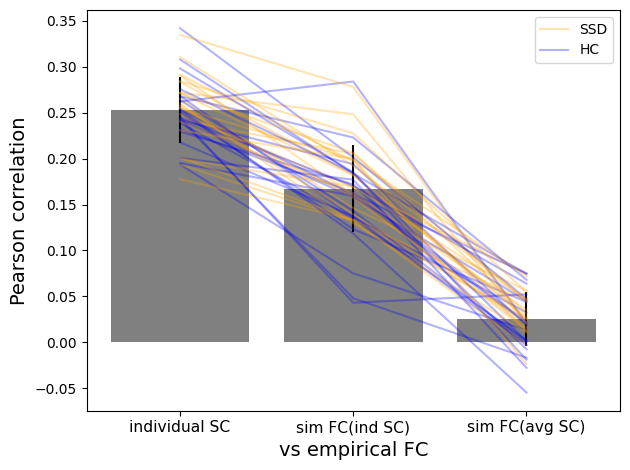

In [155]:
import importlib
import schiz_wholebrain.plot
importlib.reload(schiz_wholebrain.plot)
from schiz_wholebrain import plot
from schiz_wholebrain import quantities
importlib.reload(quantities)
from schiz_wholebrain.quantities import aln_functional_connectivity

correlations_sc = dict(
    union.collect(
        "quantities[structure_function_correlation]",
        subject_labels=True,
    )
)

correlations_sim = dict(
    union.collect(
        "quantities[aln_correlation]",
        subject_labels=True,
    )
)

correlations_sim_cohort_mean = dict(
    union.collect(
        "quantities[aln_correlation_cohort_mean]",
        subject_labels=True,
    )
)

measures = {
    'individual SC': correlations_sc,
    'sim FC(ind SC)': correlations_sim,
    'sim FC(avg SC)': correlations_sim_cohort_mean,
}

colors = {
    subject.label: 'blue' if subject.demographics['diagnosis'] == 'HC' else 'orange'
    for subject in union
}

groups = {subject.label: subject.demographics['diagnosis'] for subject in union}

plot.repeated_measures(
    measures,
    subject_colors=colors,
    subject_groups=groups,
    ylabel="Pearson correlation",
    xlabel="vs empirical FC"
)

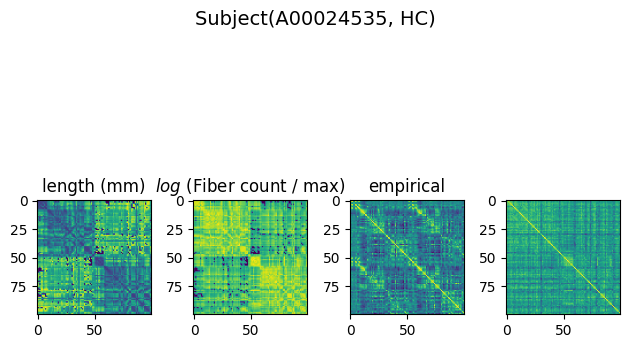

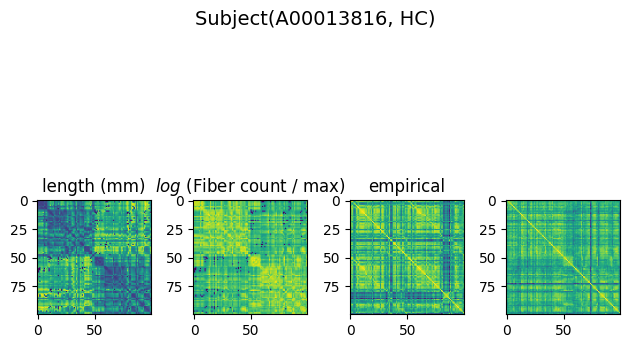

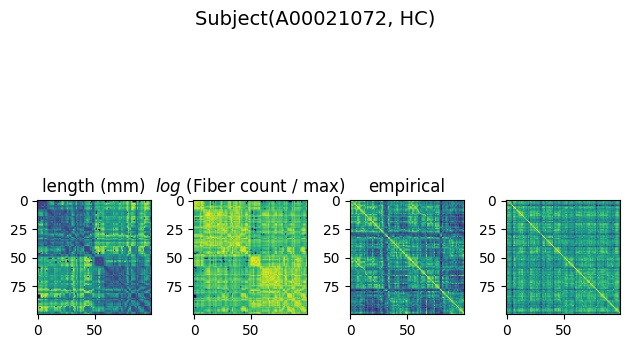

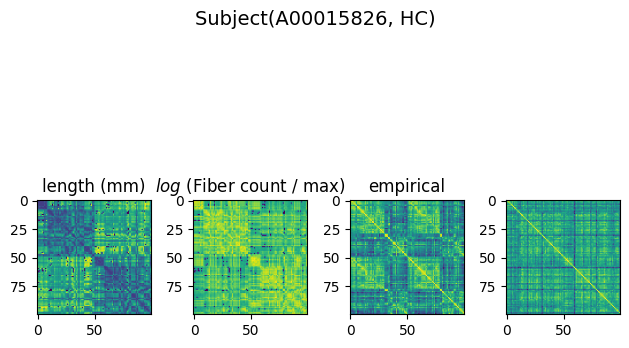

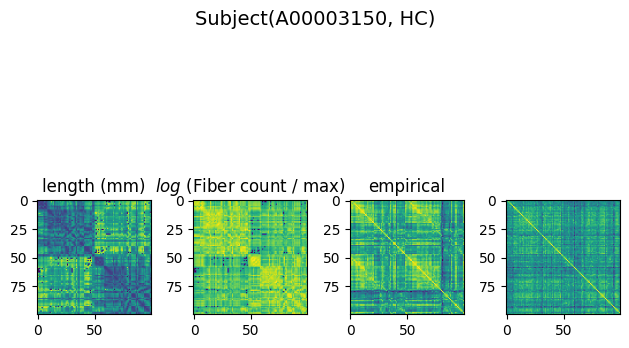

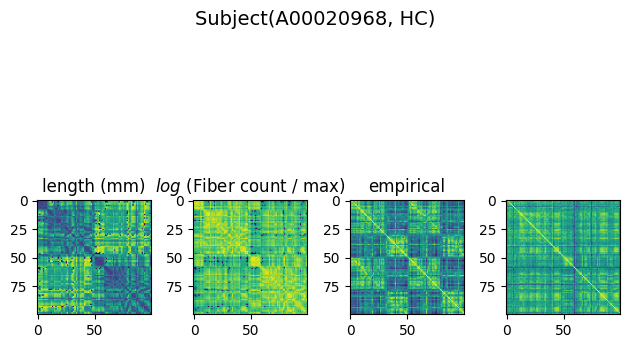

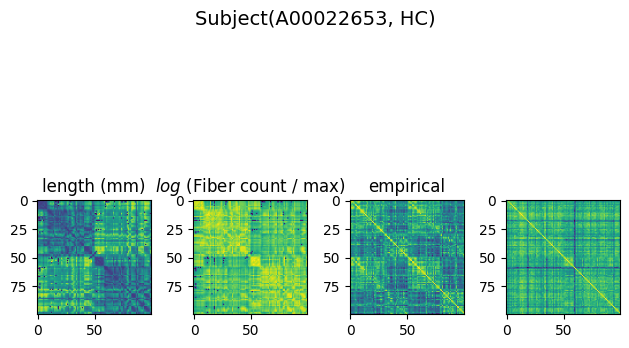

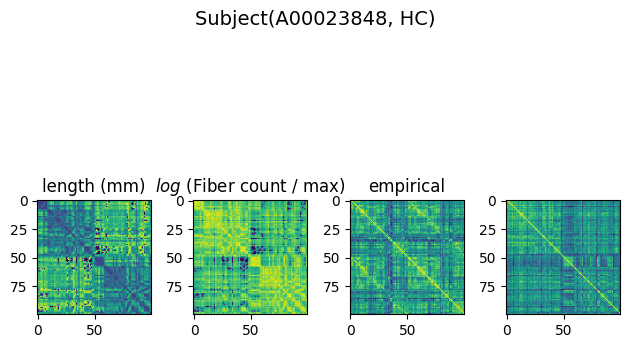

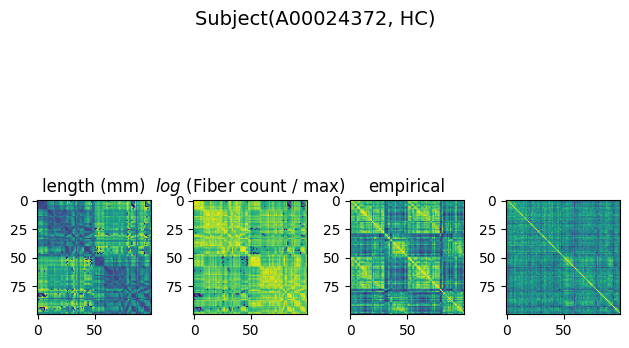

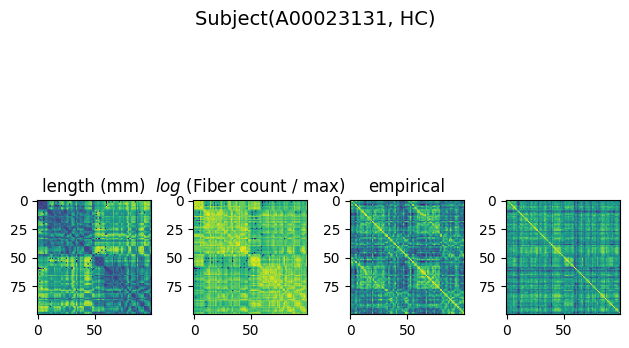

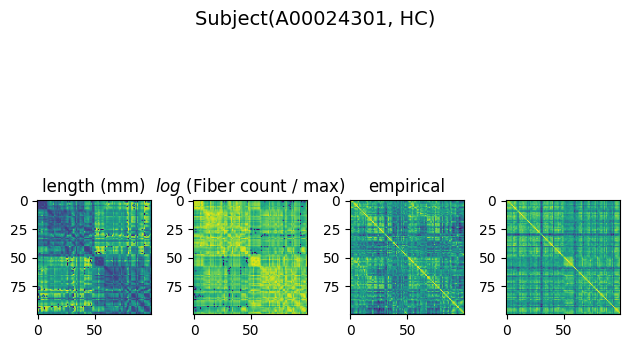

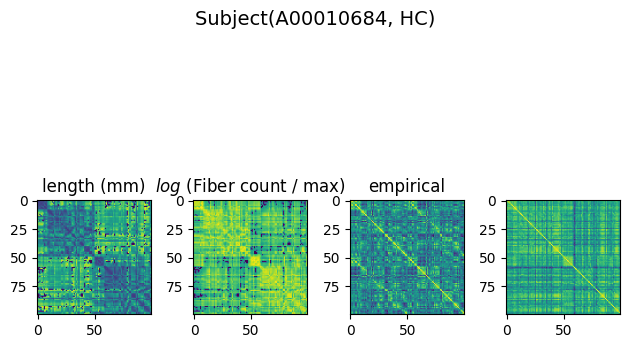

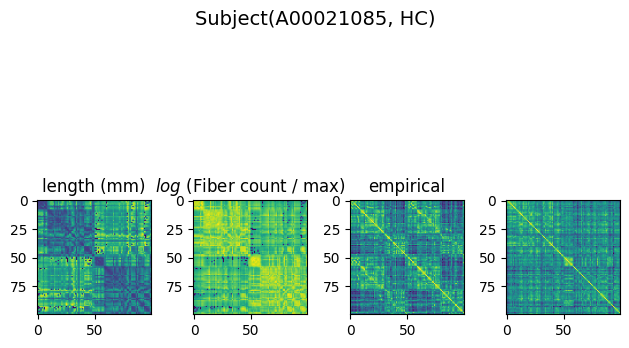

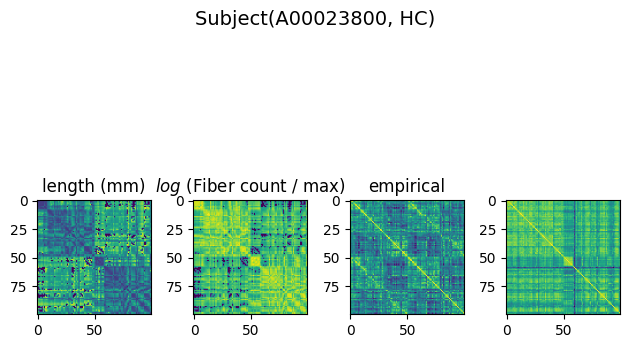

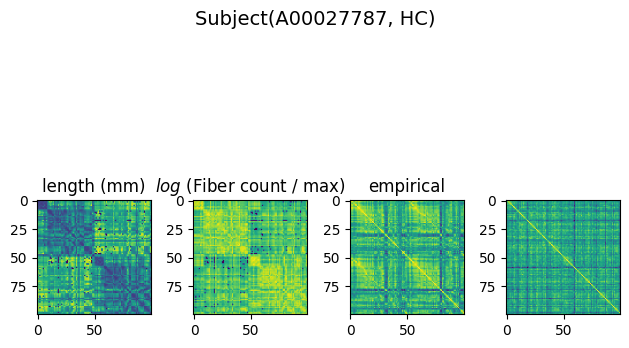

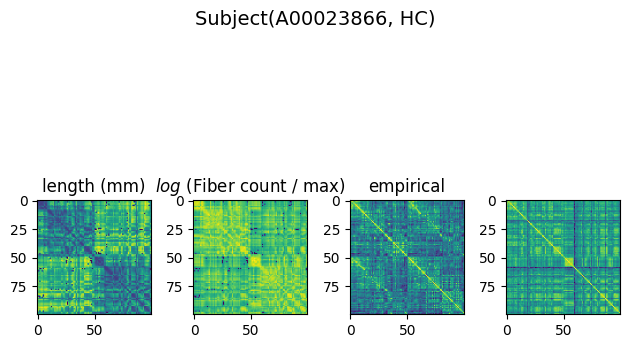

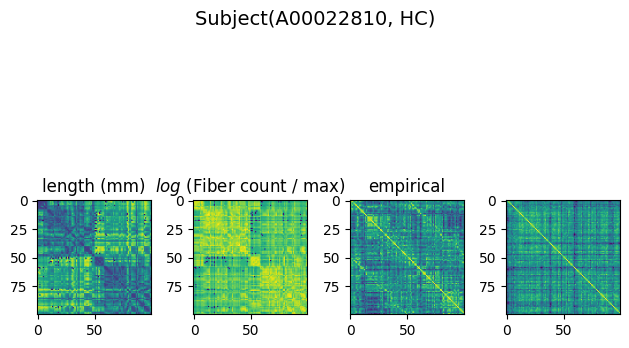

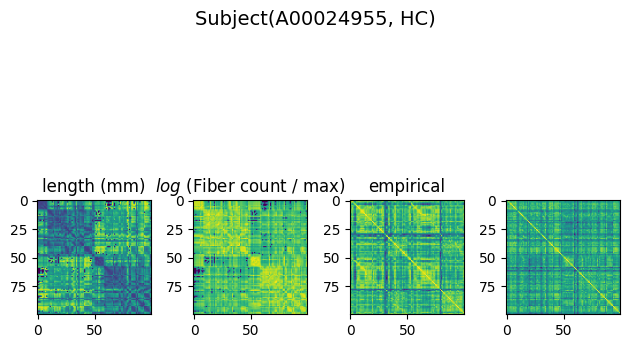

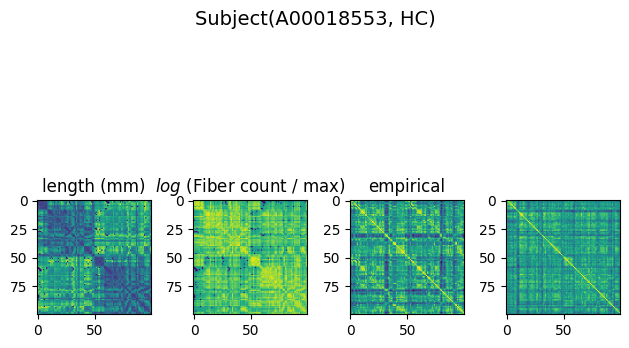

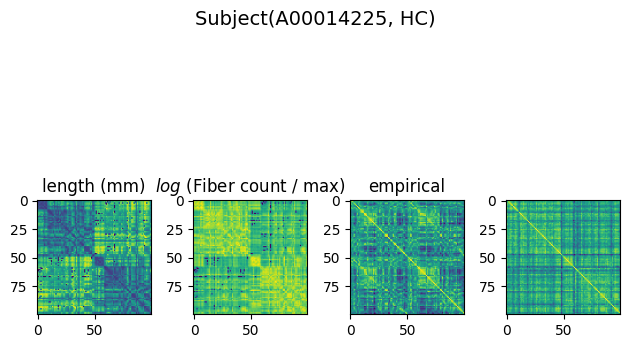

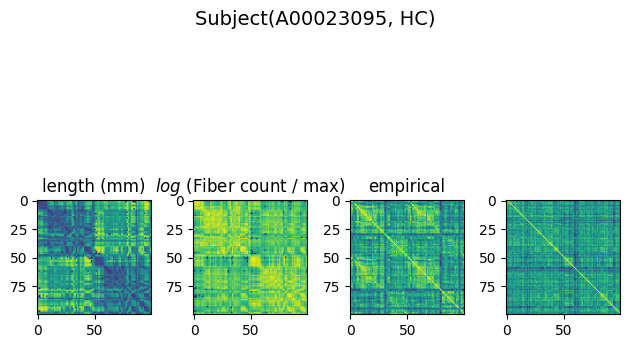

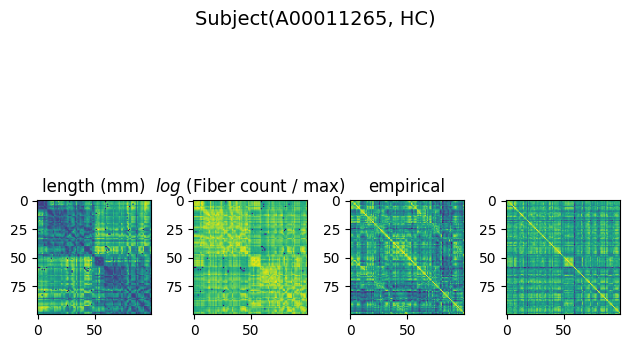

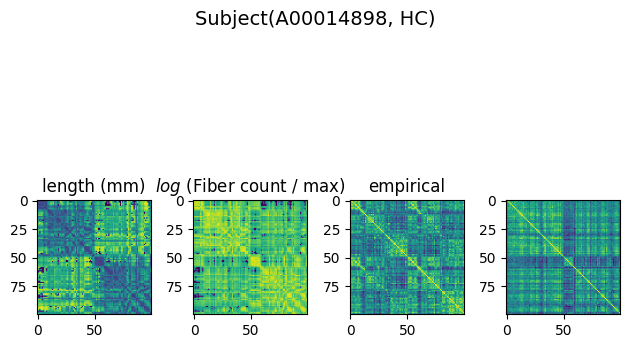

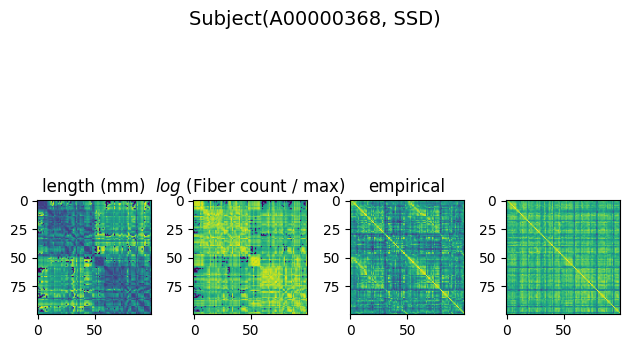

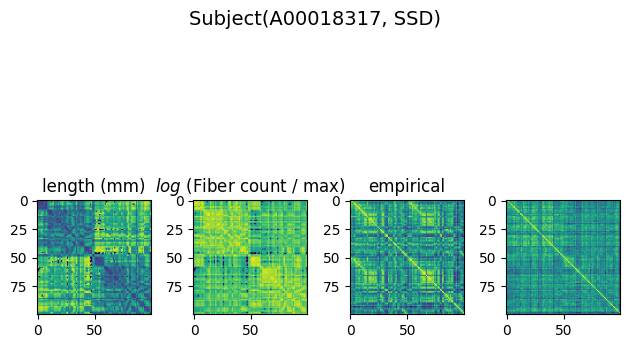

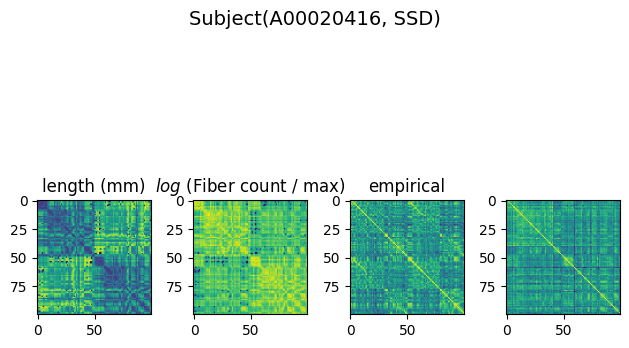

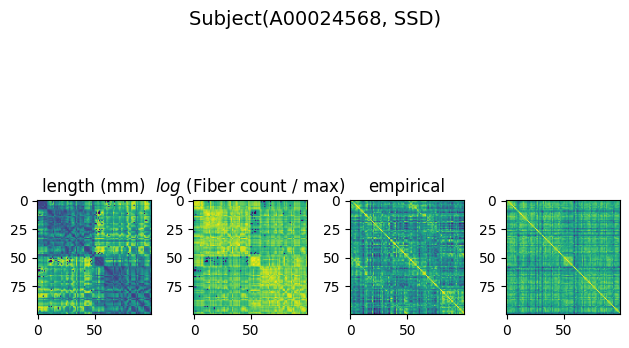

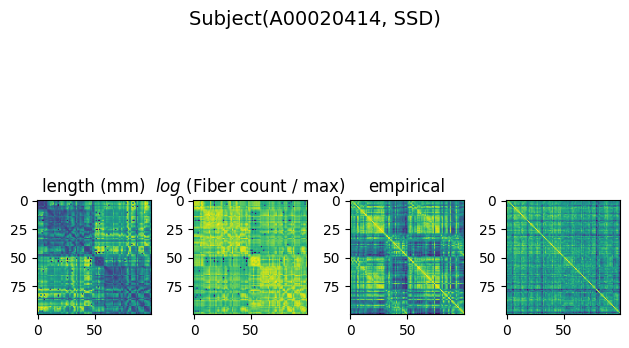

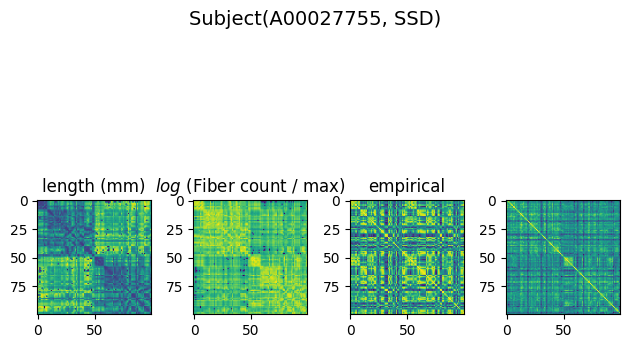

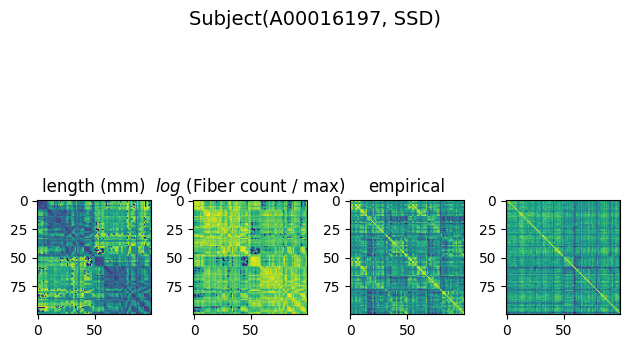

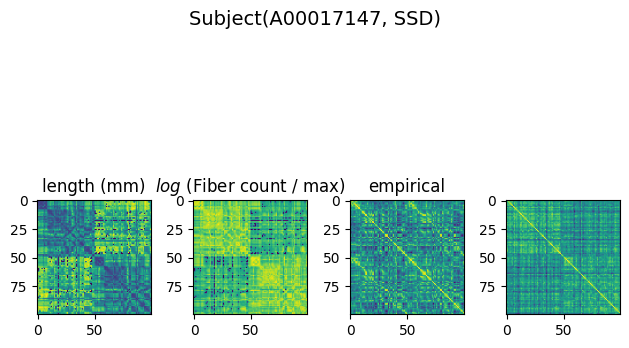

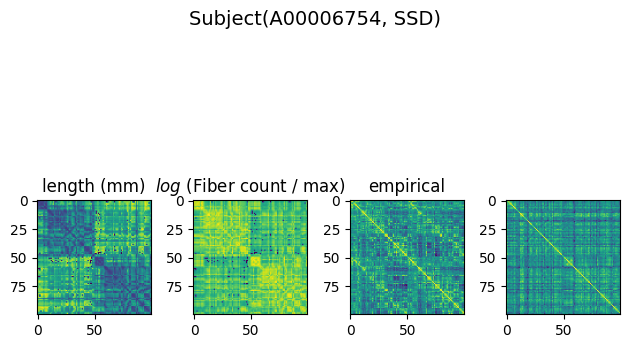

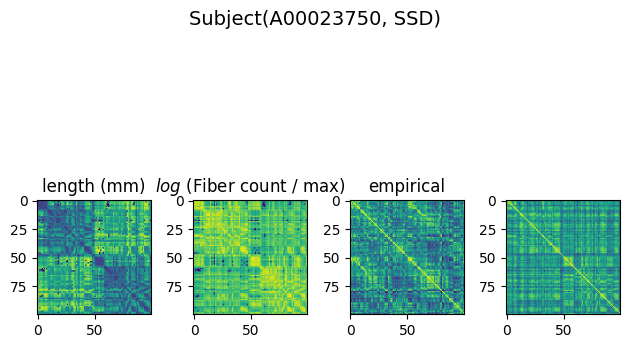

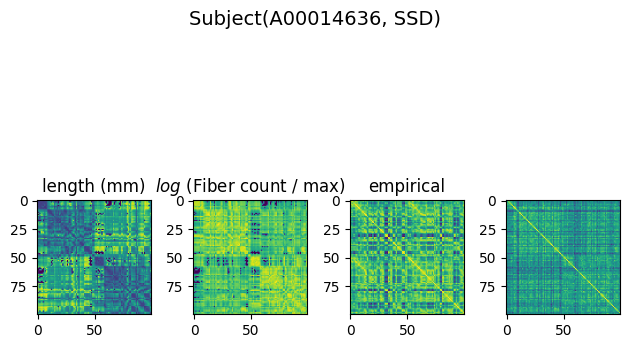

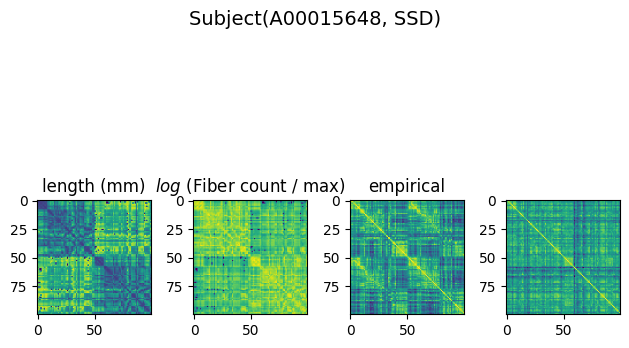

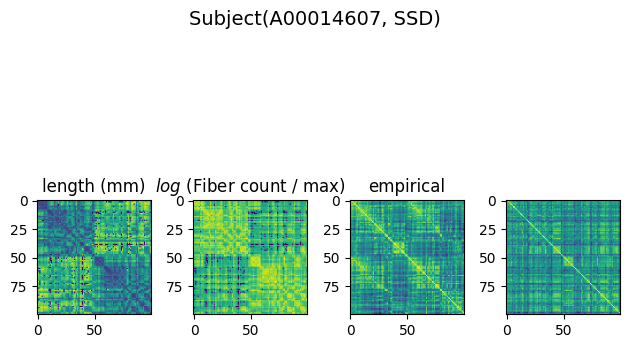

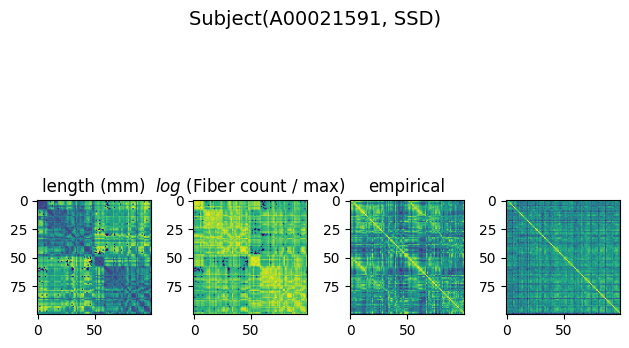

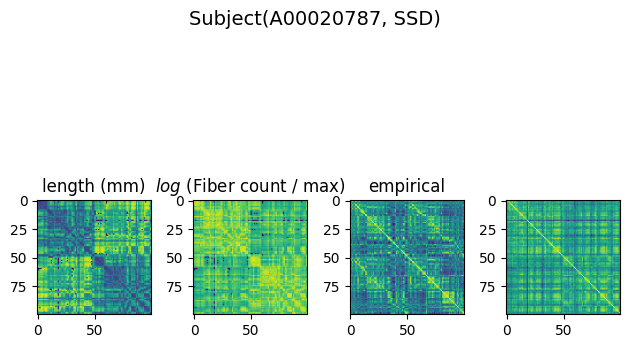

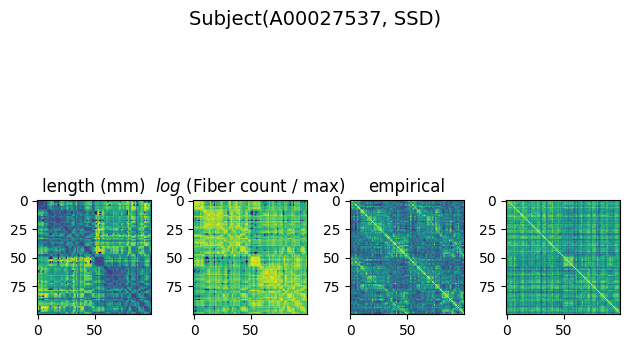

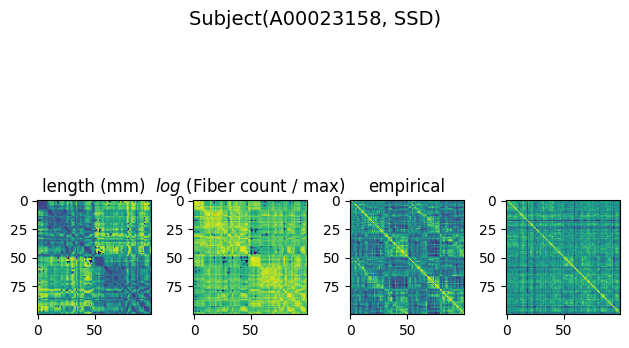

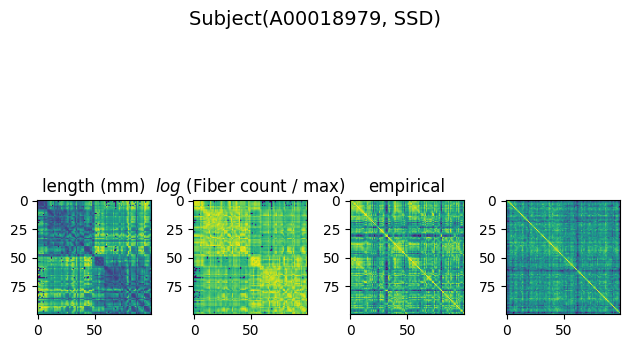

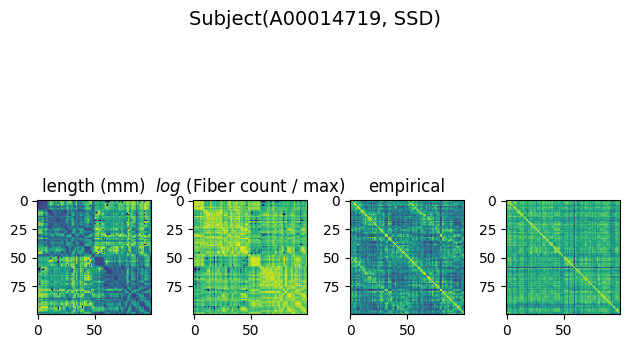

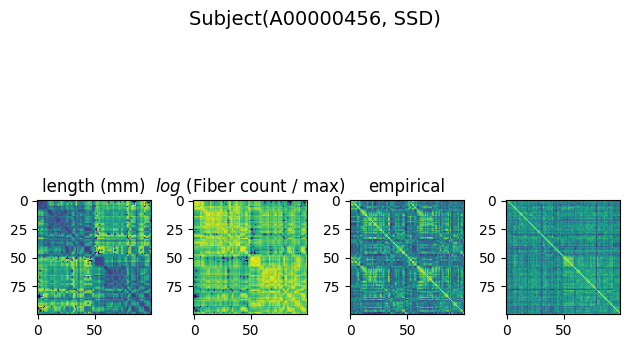

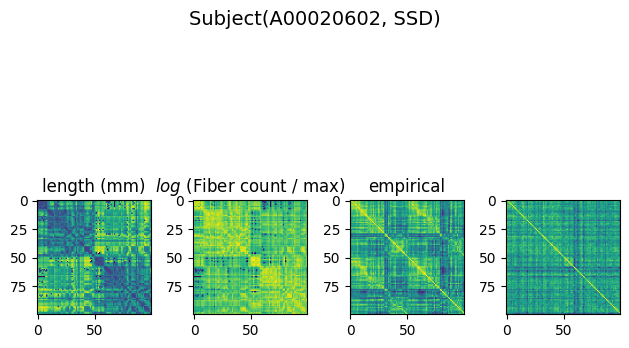

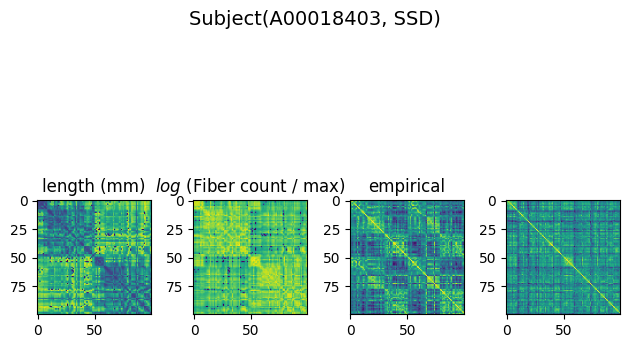

In [174]:
import importlib
import schiz_wholebrain.plot
from schiz_wholebrain import quantities
importlib.reload(quantities)
importlib.reload(schiz_wholebrain.plot)
from schiz_wholebrain import plot

CORTEX = slice(0, 100)

for cohort in (low_motion_controls, low_motion_patients):
    for subject in cohort:
        structural = subject.structural_connectivity[ATLAS].normalize('raw_count')
        distances = subject.structural_connectivity[ATLAS].mean_length
        distances = (distances + distances.T) / 2
        functional = subject.functional_connectivity[ATLAS].correlation_matrix
        simulated = subject.quantities['aln_functional_connectivity']

        structural_cortex = structural[CORTEX, CORTEX]
        distances_cortex = distances[CORTEX, CORTEX]
        functional_cortex = functional[CORTEX, CORTEX]

        plots = []

        plots.append(
            plot.connectivity(
                distances_cortex,
                title="length (mm)",
                output=True,
            )
        )

        plots.append(
            plot.connectivity(
                np.log(structural_cortex + 1e-10),
                title="$log$ (Fiber count / max)",
                output=True,
            )
        )

        plots.append(
            plot.connectivity(
                functional_cortex,
                title="empirical",
                output=True,
            )
        )

        plots.append(
            plot.connectivity(
                simulated,
                title="simulated",
                output=True,
            )
        )

        plot.compose(
            plots,
            supertitle=subject,
            shape=(1, len(plots)),
            figsize=(7, 2)
        )


In [147]:
import importlib
from schiz_wholebrain import quantities
importlib.reload(quantities)
from schiz_wholebrain.quantities import fcs

low_motion_patients.compute(fcs, absolute=True)
low_motion_controls.compute(fcs, absolute=True)

fcs_controls = np.array(list(low_motion_controls.collect("quantities[fcs]")))
fcs_patients = np.array(list(low_motion_patients.collect("quantities[fcs]")))

  0%|                                        | 0/22 [00:00<?, ?it/s]

  5%|█▍                              | 1/22 [00:00<00:08,  2.52it/s]

  9%|██▉                             | 2/22 [00:00<00:07,  2.81it/s]

 14%|████▎                           | 3/22 [00:01<00:06,  2.92it/s]

 18%|█████▊                          | 4/22 [00:01<00:06,  2.98it/s]

 23%|███████▎                        | 5/22 [00:01<00:05,  3.01it/s]

 27%|████████▋                       | 6/22 [00:02<00:05,  3.02it/s]

 32%|██████████▏                     | 7/22 [00:02<00:04,  3.03it/s]

 36%|███████████▋                    | 8/22 [00:02<00:04,  3.01it/s]

 41%|█████████████                   | 9/22 [00:03<00:04,  3.06it/s]

 45%|██████████████                 | 10/22 [00:03<00:03,  3.03it/s]

 50%|███████████████▌               | 11/22 [00:03<00:03,  3.03it/s]

 55%|████████████████▉              | 12/22 [00:04<00:03,  3.02it/s]

 59%|██████████████████▎            | 13/22 [00:04<00:02,  3.02it/s]

 64%|███████████████████▋           | 14/22 [00:04<00:02,  3.03it/s]

 68%|█████████████████████▏         | 15/22 [00:05<00:02,  3.02it/s]

 73%|██████████████████████▌        | 16/22 [00:05<00:01,  3.07it/s]

 77%|███████████████████████▉       | 17/22 [00:05<00:01,  3.03it/s]

 82%|█████████████████████████▎     | 18/22 [00:05<00:01,  3.05it/s]

 86%|██████████████████████████▊    | 19/22 [00:06<00:00,  3.13it/s]

 91%|████████████████████████████▏  | 20/22 [00:06<00:00,  3.17it/s]

 95%|█████████████████████████████▌ | 21/22 [00:06<00:00,  3.07it/s]

100%|███████████████████████████████| 22/22 [00:07<00:00,  3.30it/s]

100%|███████████████████████████████| 22/22 [00:07<00:00,  3.06it/s]

  0%|                                        | 0/23 [00:00<?, ?it/s]

  4%|█▍                              | 1/23 [00:00<00:08,  2.64it/s]

  9%|██▊                             | 2/23 [00:00<00:07,  2.77it/s]

 13%|████▏                           | 3/23 [00:01<00:06,  2.86it/s]

 17%|█████▌                          | 4/23 [00:01<00:06,  2.88it/s]

 22%|██████▉                         | 5/23 [00:01<00:06,  2.77it/s]

 26%|████████▎                       | 6/23 [00:02<00:05,  2.85it/s]

 30%|█████████▋                      | 7/23 [00:02<00:05,  2.86it/s]

 35%|███████████▏                    | 8/23 [00:02<00:05,  2.90it/s]

 39%|████████████▌                   | 9/23 [00:03<00:04,  2.90it/s]

 43%|█████████████▍                 | 10/23 [00:03<00:04,  2.86it/s]

 48%|██████████████▊                | 11/23 [00:03<00:04,  2.92it/s]

 52%|████████████████▏              | 12/23 [00:04<00:03,  2.92it/s]

 57%|█████████████████▌             | 13/23 [00:04<00:03,  2.94it/s]

 61%|██████████████████▊            | 14/23 [00:04<00:03,  2.95it/s]

 65%|████████████████████▏          | 15/23 [00:05<00:02,  2.96it/s]

 70%|█████████████████████▌         | 16/23 [00:05<00:02,  2.98it/s]

 74%|██████████████████████▉        | 17/23 [00:05<00:02,  3.00it/s]

 78%|████████████████████████▎      | 18/23 [00:06<00:01,  2.99it/s]

 83%|█████████████████████████▌     | 19/23 [00:06<00:01,  3.09it/s]

 87%|██████████████████████████▉    | 20/23 [00:06<00:00,  3.10it/s]

 91%|████████████████████████████▎  | 21/23 [00:07<00:00,  3.15it/s]

 96%|█████████████████████████████▋ | 22/23 [00:07<00:00,  3.17it/s]

100%|███████████████████████████████| 23/23 [00:07<00:00,  3.29it/s]

100%|███████████████████████████████| 23/23 [00:07<00:00,  2.99it/s]

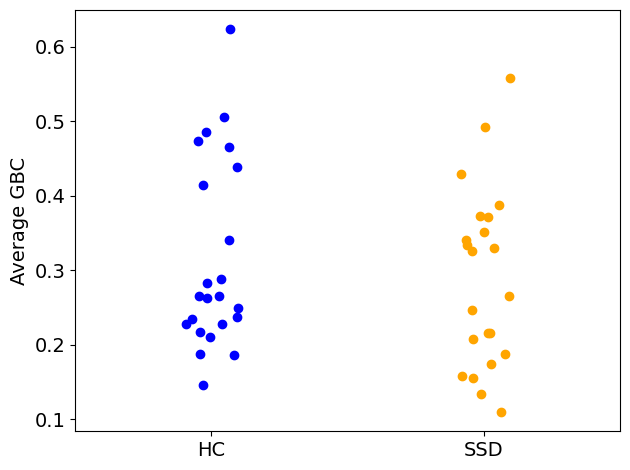

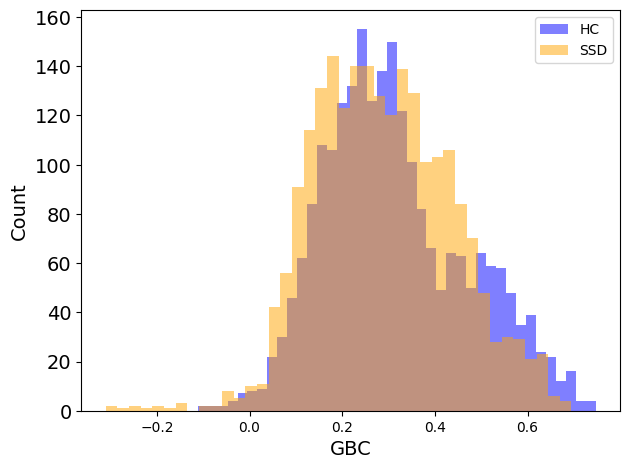

In [176]:
import importlib
import schiz_wholebrain.plot
importlib.reload(schiz_wholebrain.plot)
from schiz_wholebrain import plot

plot.scatter(
    [brain.mean() for brain in fcs_controls],
    [brain.mean() for brain in fcs_patients],
    ylabel="Average GBC",
)

plot.density(
    np.concatenate(fcs_controls),
    np.concatenate(fcs_patients),
    xlabel="GBC",
    ylabel="Count",
)

In [39]:
import numpy as np

fourier_patients = [
    np.fft.fft(subject.functional_connectivity[ATLAS].time_series, axis=0)
    for subject in low_motion_patients
]

fourier_controls = [
    np.fft.fft(subject.functional_connectivity[ATLAS].time_series, axis=0)
    for subject in low_motion_controls
]

sample_rate = 2                 # Seconds
nyquist_freq = (1 / sample_rate) / 2

band = [0.04, 0.07]

narrowband_patients = []

# for patient in patients:
#     freq = np.fft.fftfreq(patient.shape[0], sample_rate)
#     mask = np.logical_and(band[0] < np.abs(freq), np.abs(freq) < band[1])
#     filtered_fourier = patient * mask

array([ 0.00000000e+00, -1.96690027e+01, -2.96982510e+01,  1.13452310e+01,
       -2.16663775e+01,  1.47337632e+01,  3.42040914e+01,  1.75899382e+01,
       -1.84167329e+01,  1.75141964e+00,  1.99292551e+01, -1.97934634e+00,
       -3.04023024e+01,  2.65930059e+00, -1.52007891e+01, -6.64393978e+00,
        9.63626263e+00,  2.22381902e+00, -7.00874839e-01, -3.09869997e+01,
       -2.43117864e+01, -1.16512780e+01, -1.85160991e+01,  4.19165313e+00,
       -1.24733805e+01, -1.48353162e+01, -2.35668668e+00, -2.41133710e+01,
        2.01972761e+01,  1.75864675e+01,  4.29308024e+00,  1.05782299e+01,
        1.47643352e+00, -6.81364078e+00, -7.53483099e+00, -5.53874460e+00,
       -3.40380032e+00,  1.23571917e+00,  4.35760029e+00,  3.29838836e+00,
        7.46275431e-01, -8.70206574e-01, -3.32419559e+00, -4.75428069e+00,
       -2.94362911e+00, -5.70045684e-01,  8.02741771e-01,  2.53860853e+00,
        3.34811673e+00,  1.73587099e+00, -2.71819064e-02, -7.61469082e-01,
       -1.78026121e+00, -

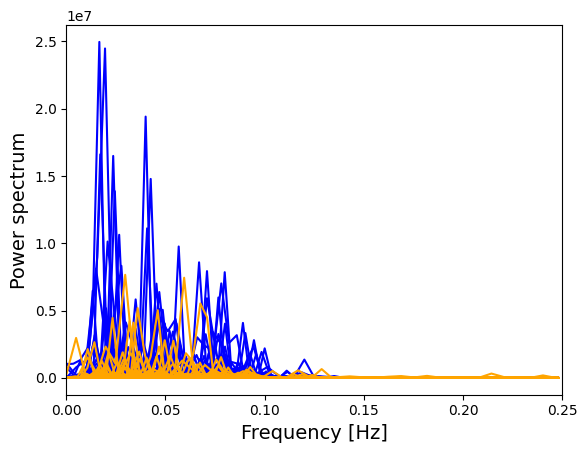

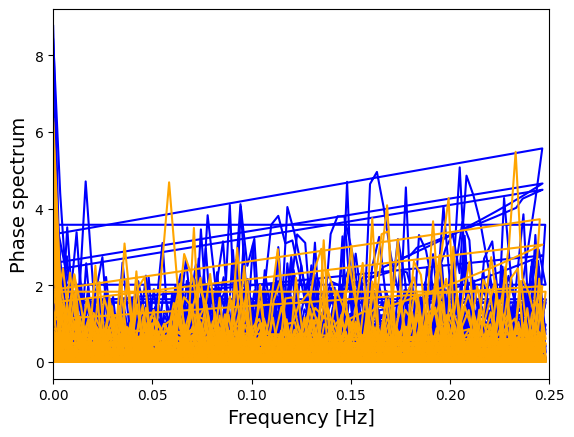

In [43]:
plot.spectrum(
    [np.abs(c.mean(axis=1)) ** 2 for c in fourier_controls],
    [np.abs(p.mean(axis=1)) ** 2 for p in fourier_patients],
    xlim=[0, nyquist_freq],
    xlabel="Frequency [Hz]",
    ylabel="Power spectrum",
)

plot.spectrum(
    [np.angle(c).mean(axis=1) for c in fourier_controls],
    [np.angle(p).mean(axis=1) for p in fourier_patients],
    xlim=[0, nyquist_freq],
    xlabel="Frequency [Hz]",
    ylabel="Phase spectrum",
)
